In [1]:
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

In [2]:
from sklearn.cluster import KMeans
import prepare 

In [3]:
df = prepare.wrangle_zillow()

In [4]:
df.shape

(63657, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63657 entries, 0 to 63656
Data columns (total 33 columns):
propertylandusetypeid           63657 non-null object
parcelid                        63657 non-null object
id                              63657 non-null object
bathroomcnt                     63657 non-null float64
bedroomcnt                      63657 non-null float64
buildingqualitytypeid           63657 non-null float64
calculatedfinishedsquarefeet    63657 non-null float64
finishedsquarefeet12            63657 non-null float64
fips                            63657 non-null int64
latitude                        63657 non-null object
longitude                       63657 non-null object
lotsizesquarefeet               63657 non-null float64
propertycountylandusecode       63657 non-null object
rawcensustractandblock          63657 non-null float64
regionidcity                    63657 non-null float64
regionidcounty                  63657 non-null object
regionidzip         

In [32]:
df.head(3)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,cluster
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,2
1,261,14186244,11677,2.0,3.0,8.0,1243.0,1243.0,6059,3.38862e+07,...,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,0
2,266,14705431,2116302,2.5,3.0,8.0,1337.0,1337.0,6059,3.36637e+07,...,6.059099e+13,12,-0.028835,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,2


In [7]:
continuous_data = df.select_dtypes(include=["int", "float"])

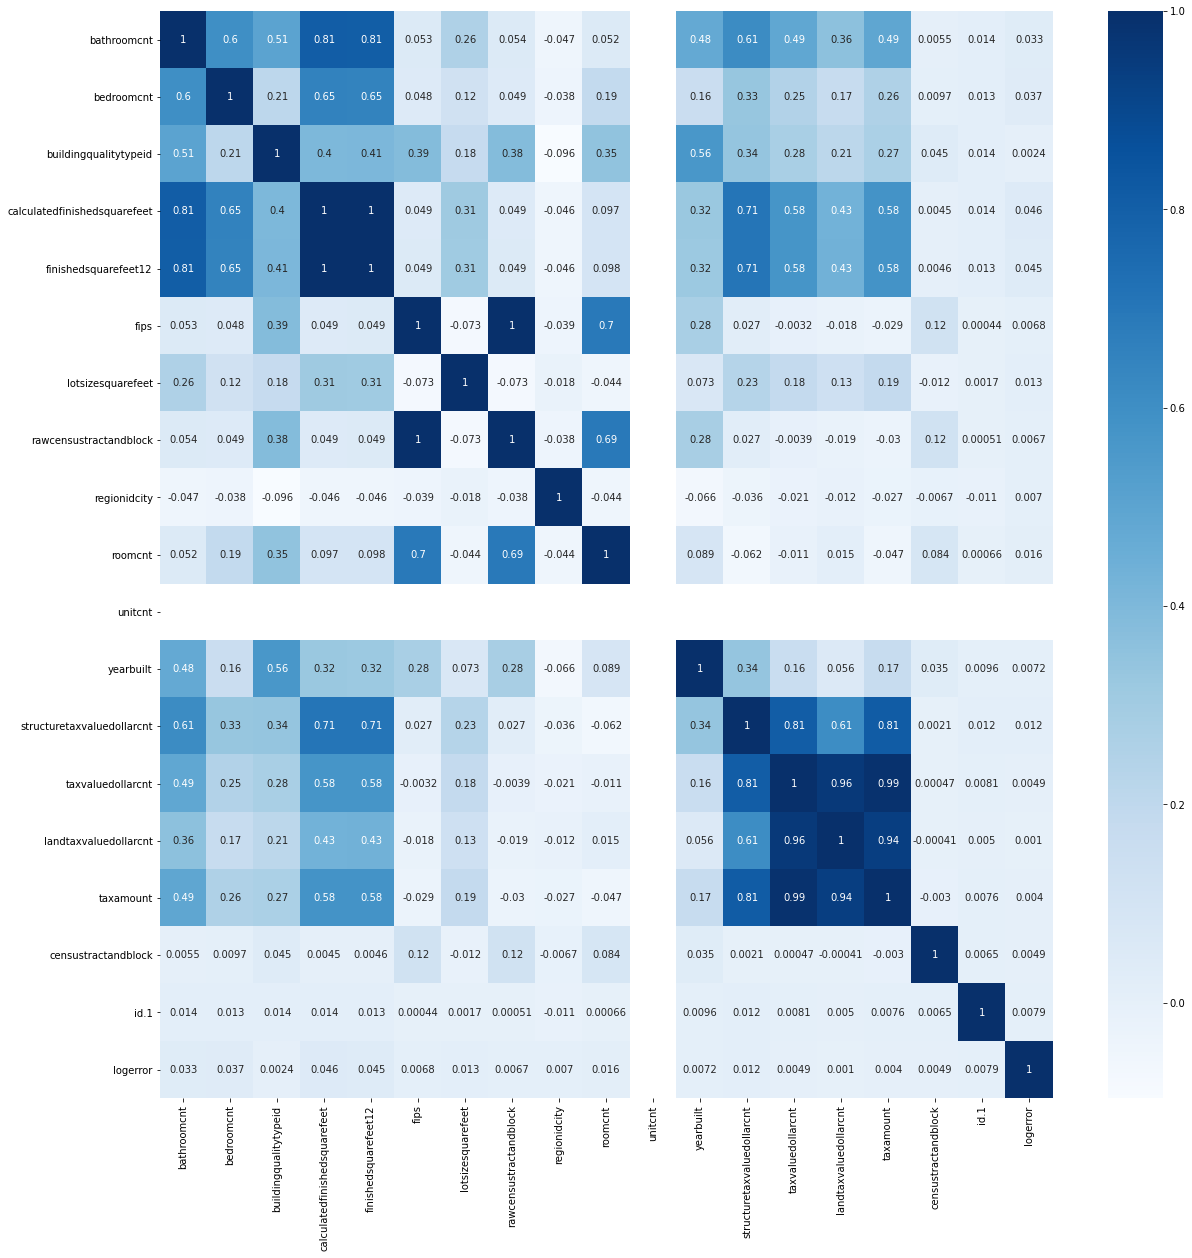

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(continuous_data.corr(), cmap='Blues', annot=True)
#plt.ylim(0, 4)

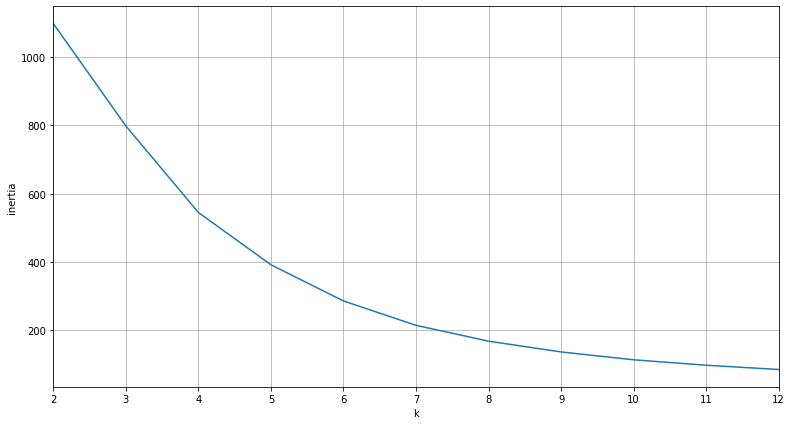

In [9]:
X = df[['logerror']]

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [10]:
kmeans = KMeans(5).fit(X)
df['cluster_target'] = kmeans.labels_
df.cluster_target = 'cluster_target' + df.cluster_target.astype(str)

In [11]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,logerror
0,0.009689
1,1.888202
2,0.340142
3,-2.265634
4,-0.224337


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12486e590>]],
      dtype=object)

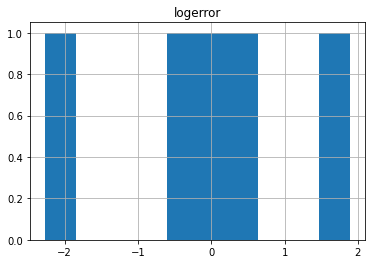

In [12]:
centroids.hist()

In [35]:
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,cluster
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,2
1,261,14186244,11677,2.0,3.0,8.0,1243.0,1243.0,6059,3.38862e+07,...,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,0
2,266,14705431,2116302,2.5,3.0,8.0,1337.0,1337.0,6059,3.36637e+07,...,6.059099e+13,12,-0.028835,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,2
3,261,13944538,249412,2.5,3.0,8.0,1340.0,1340.0,6059,3.37714e+07,...,6.059089e+13,13,0.045602,2017-01-02,None,Single Family Residential,CA,Orange County,cluster_target0,0
4,266,14731691,2205733,2.0,2.0,8.0,970.0,970.0,6059,3.37156e+07,...,6.059099e+13,14,-0.008935,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,2


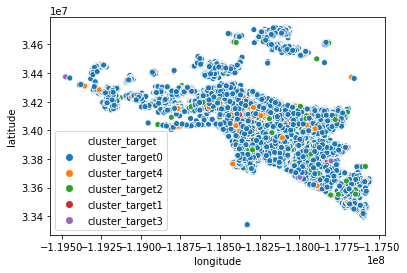

In [24]:
sns.scatterplot(x='longitude', y='latitude',hue="cluster_target", data=df)
plt.show()

Takeaway: It seems vast majority data points' logerror fell into cluster0 which has the lowest log error.

In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [27]:
X = df[['latitude', 'longitude', 'logerror']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

array([3, 1, 3, ..., 1, 1, 1], dtype=int32)

In [28]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,latitude,longitude,logerror
0,3.463046e+07,-1.181402e+08,0.013113
1,3.393651e+07,-1.180339e+08,0.020262
2,3.423514e+07,-1.189802e+08,0.015948
3,3.365466e+07,-1.177674e+08,0.021408
4,3.412033e+07,-1.184138e+08,0.009399


[Text(0.5, 0, 'logerror'), Text(0.5, 0, 'longitude'), Text(0.5, 0, 'latitude')]

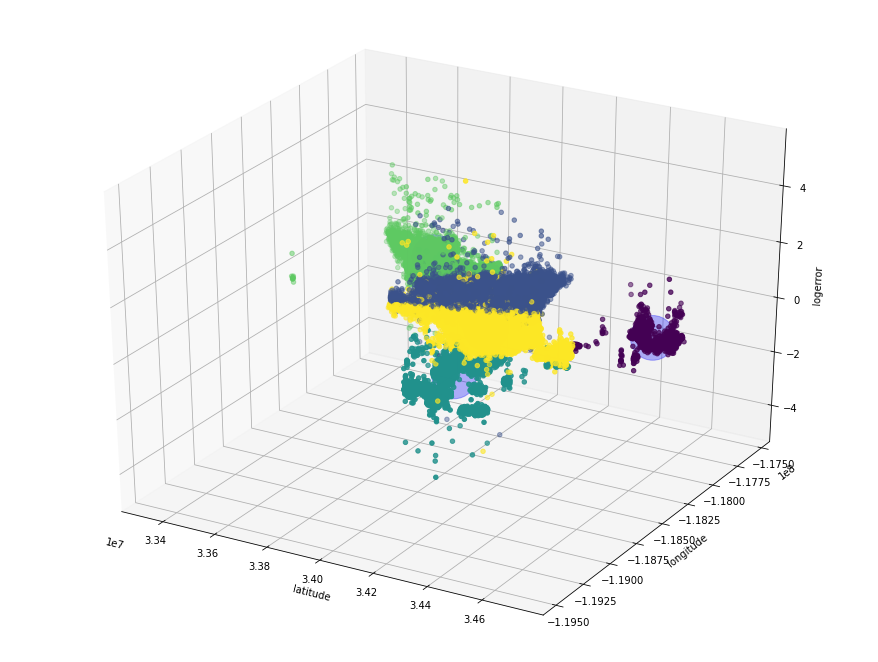

In [30]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
ax.scatter(X.latitude, X.longitude, X.logerror, c=kmeans.labels_)
ax.scatter(centers.latitude, centers.longitude, centers.logerror, c='blue', s=2000, alpha=.3)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='logerror')

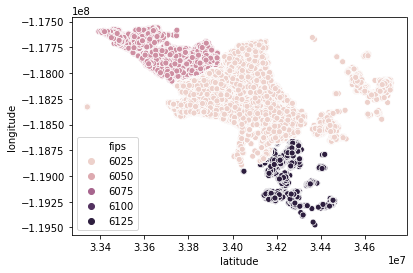

In [31]:
sns.scatterplot(x ='latitude',y ='longitude', hue = 'fips',data = df)

In [15]:
df.head(1)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0


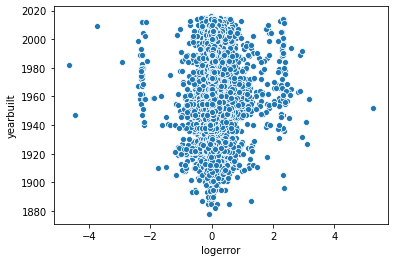

In [16]:
sns.scatterplot(x='logerror',y='yearbuilt', data = df)

In [17]:
X = df[['latitude', 'longitude']]

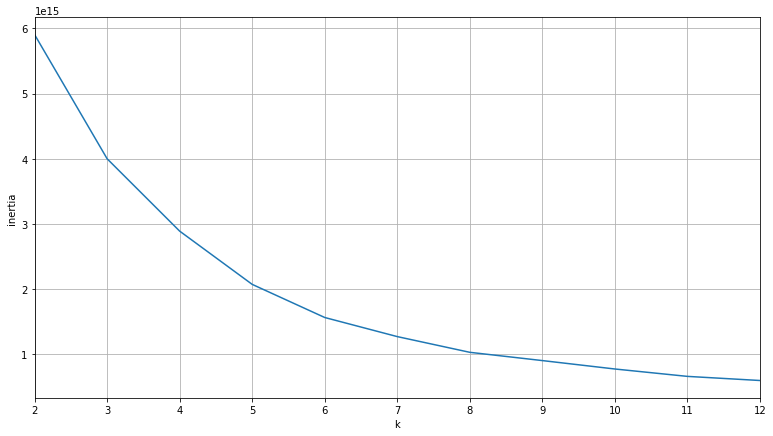

In [18]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [19]:
kmeans = KMeans(5)
kmeans.fit(X)
kmeans.predict(X)

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [20]:
df['cluster'] = kmeans.predict(X)
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,cluster
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,2
1,261,14186244,11677,2.0,3.0,8.0,1243.0,1243.0,6059,3.38862e+07,...,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,0
2,266,14705431,2116302,2.5,3.0,8.0,1337.0,1337.0,6059,3.36637e+07,...,6.059099e+13,12,-0.028835,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,2
3,261,13944538,249412,2.5,3.0,8.0,1340.0,1340.0,6059,3.37714e+07,...,6.059089e+13,13,0.045602,2017-01-02,None,Single Family Residential,CA,Orange County,cluster_target0,0
4,266,14731691,2205733,2.0,2.0,8.0,970.0,970.0,6059,3.37156e+07,...,6.059099e+13,14,-0.008935,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,2


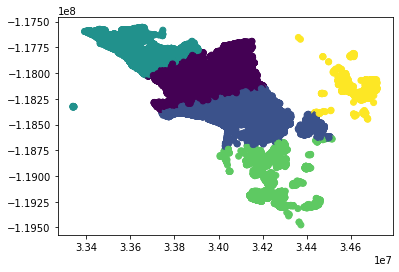

In [21]:
plt.scatter(df.latitude, df.longitude, c=df.cluster)